In [1]:
import numpy as np
import pandas as pd
import igraph as ig
from igraph import *

A graph is define as  G = (V,E) 

g = Graph(V,E,labels)
* V : list of vertex: type int 
* E: list of edges
    * an edge is represented as a list of staring edge, end edge and weight  [edge_1, edge_2, w_1_2]: type int
* labels : list of names of each vetex
    

In [2]:
class Graph:
    # Orienterd Graph (graphe orienté pondéré)
    def __init__(self,V,E,labels = None): 
        self.V = V
        self.E = E 
        self.labels = labels
        self.n = len(V)
        self.m = len(E)
        self.adj_matrix =  np.array([[0]*self.n for _ in range(self.n)]) 
        self.weight = np.array([[0]*self.n for _ in range(self.n)]) 

        self.adj_matrix = np.array([[0]*self.n for _ in range(self.n)]) 
        self.weight  = np.array([[0]*self.n for _ in range(self.n)]) 
        for edge in self.E:
            i = edge[0]
            j = edge[1]
            self.adj_matrix[i][j] = 1
            self.weight[i][j] = edge[2]
    '''
    def add_edges(self,v1, v2,weight):
        # change the size of adj_matrix and weight matrix 
        self.adj_matrix[v1][v2] = 1
        self.weight[v1][v2] = weight
    '''
    # This function print adjency matrix as a dataframe
    def print_adjency_matrix(self):
        print(pd.DataFrame(self.adj_matrix, columns= self.labels, index=self.labels))

    # This function print weight matrix as a dataframe
    def print_weight_matrix(self):
        print(pd.DataFrame(self.weight, columns= self.labels, index=self.labels))

    # this function print the graph informations : number of nodes, edges, adjency matrix and weight matrix
    def graph_info(self):
        print("This graph has : ",self.n,"nodes and ", self.m,"edges")
        print("Adjency matrix")
        self.print_adjency_matrix()
        print("Weight matrix")
        self.print_weight_matrix()       


    # plot functions (inorder to plot the graph igrpah libary is used)
    # create_ig_graph(): create a graph using igraph based on our graph g 
    def create_ig_graph(self):
        A = pd.DataFrame(self.adj_matrix).values
        # create graph using igraph 
        # For that we need list of edges in the right order 
        g_plot = ig.Graph.Adjacency((A > 0).tolist())
        # Add edge weights to the graph
        g_plot.vs['label'] = self.labels
        # Add node labels to the graph
        g_plot.es["weight"] = self.weight.flatten()[self.weight.flatten() != 0].tolist()
        return g_plot
   
    # plot_graph() : plot a graph using igraph
    def plot_graph(self):
        g_plot = self.create_ig_graph()
        return plot(g_plot, layout=g_plot.layout(layout='auto'), edge_label=g_plot.es["weight"], bbox=(300, 300))
    
    # plot_graph_color_path() : generates a graph visualization where the edges are colored based on a provided list of nodes sequence
    def plot_graph_color_path(self,nodes_list):
        if ((self.labels != None) and (not (all(isinstance(x, (int, np.int32)) for x in nodes_list)))):
            nodes_list = [self.labels.index(item) for item in nodes_list]
        graph_edges, edges_list, edge_id_to_color = [], [], []

        g_plot = self.create_ig_graph()
        # we alrady have this so I will change it to self.E [:][0,1]
        #graph_edges = [[i, j] for i in range(len(self.adj_matrix)) for j in range(len(self.adj_matrix[i])) if self.adj_matrix[i][j] == 1]
        graph_edges = sorted(self.E, key=lambda x: (x[0], x[1]))
        graph_edges = [[x[0], x[1]] for x in graph_edges]

        edges_list = [[nodes_list[i], nodes_list[i+1]] for i in range(len(nodes_list)-1)] 
        
        # in igraph each edge has an id (eg. {AC, AB} 0 refer to AB, 1 refer to AC)
        edge_id_to_color = [j for i in range(len(edges_list)) for j in range(len(graph_edges)) if edges_list[i] == graph_edges[j]]

        # define edges color 
        edge_colors = ["red" if i in edge_id_to_color else "black" for i in range(len(g_plot.es))]  

        # define a style 
        visual_style = {
            "vertex_color": "lightblue",
            "edge_color": edge_colors,
            "edge_width": 2,
            "bbox": (300, 300),
            "margin": 20
        }
        return plot(g_plot, layout=g_plot.layout(layout='auto'), edge_label = g_plot.es["weight"], **visual_style)  
        
    # Shortest path

    def relax(self,d):
        # Find indices where value is equal to 1
        edges = np.where(self.adj_matrix == 1)
        edges = list(zip(edges[0], edges[1]))
        '''
        # ohter_v = self.V.remove(element_to_remove)
        # for i in ohter_v 
        '''
        # Relax  
        # for i from 1 -> n-1 do
        for i in range(1,self.n):  #change this 
            # for (u,v) in E do       
            for edge in edges:
                u = edge[0]
                v = edge[1]
                d_2 = d[i-1,u,0] + self.weight[u,v]
                if d[i,v,0] > d_2:
                    d[i,v,0] = d_2
                    d[i,v,1] = u
            if np.array_equal(d[i-1],d[i]):
                return i,d
            i = i+ 1 
        # check if there is a negative cycle    
        for edge in edges:
                u = edge[0]
                v = edge[1]
                d_2 = d[i-1,u,0] + self.weight[u,v]
                if d[i-1,v,0] > d_2:
                    print("Negative Cycle")

        return i,d
     
    def algo_Ballman_Ford(self, source=0):
        # Step 1: Initlialization 
        # Initialization
        d = np.full((self.n,self.n,2), np.inf)  # d and node that it came from
        d[:,source,0] = np.zeros((self.n))
        
        # relax all the edges i times 
        i,d = self.relax(d)

        # def traceback 
        # get sequence of short path 
        stop_node = self.n-1 # 4     
        path_list = [stop_node]
        current_node = stop_node

        for j in range(1,i):
            print(d[j,:,0])
            #print(d[self.n-i,current_node,1])
            previous_node = int(d[self.n-j,current_node,1])
            path_list = np.append(path_list,previous_node)
            current_node = previous_node
            
        path_list = np.flip(path_list)  
        path_letters = None
        if self.labels != None:
            path_letters =  [self.labels[i] for i in path_list]

        distance_s_v = d[:,:,0]
        return i, path_list, path_letters, distance_s_v

This graph has :  6 nodes and  10 edges
Adjency matrix
   A  B  C  D  E  F
A  0  1  1  0  0  0
B  0  0  1  1  1  0
C  0  0  0  1  0  0
D  0  1  0  0  0  1
E  0  0  0  1  0  1
F  0  0  0  0  0  0
Weight matrix
   A  B  C  D  E  F
A  0  3  4  0  0  0
B  0  0  9  2  2  0
C  0  0  0 -5  0  0
D  0 -2  0  0  0  3
E  0  0  0  3  0  1
F  0  0  0  0  0  0


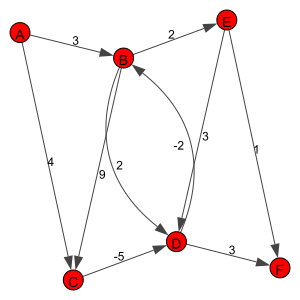

In [3]:
v = [0,1,2,3,4,5]
e = [[0,1,3],[0,2,4],[1,2,9],[1,3,2],[1,4,2],[2,3,-5],[3,1,-2],[3,5,3],[4,3,3],[4,5,1]]
g = Graph(V=v,E=e, labels=['A', 'B', 'C', 'D', 'E', 'F'])
g.graph_info()
g.plot_graph()

In [4]:
i, path_list, path_letters, distance_s_v = g.algo_Ballman_Ford(source=0)

[ 0.  3.  4. inf inf inf]
[ 0.  3.  4. -1.  5. inf]
[ 0. -3.  4. -1.  5.  2.]
[ 0. -3.  4. -1. -1.  2.]
[ 0. -3.  4. -1. -1.  0.]


In [5]:
print("Number of iterations ",i)
print("shorthest path of all graph ",path_letters)
print("distance matrix",distance_s_v)


Number of iterations  6
shorthest path of all graph  ['A', 'C', 'D', 'B', 'E', 'F']
distance matrix [[ 0. inf inf inf inf inf]
 [ 0.  3.  4. inf inf inf]
 [ 0.  3.  4. -1.  5. inf]
 [ 0. -3.  4. -1.  5.  2.]
 [ 0. -3.  4. -1. -1.  2.]
 [ 0. -3.  4. -1. -1.  0.]]


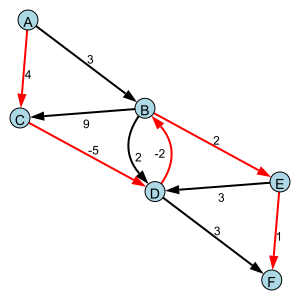

In [8]:
# def Bellmanford result
# Number of iterations 
# shorthest path of all graph 
g.plot_graph_color_path(path_list)

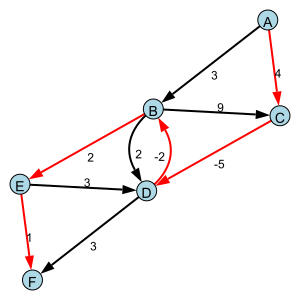

In [7]:
g.plot_graph_color_path(path_letters)